# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways oversold my...
1,✅ Trip Verified | I travelled London to Doha ...
2,✅ Trip Verified | When dropping off my luggag...
3,✅ Trip Verified | If you can’t fly First Class...
4,Not Verified | Singapore to Heathrow. Busine...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,✅ Trip Verified | British Airways oversold my...
1,✅ Trip Verified | I travelled London to Doha ...
2,✅ Trip Verified | When dropping off my luggag...
3,✅ Trip Verified | If you can’t fly First Class...
4,Not Verified | Singapore to Heathrow. Busine...
...,...
995,✅ Trip Verified | My boyfriend and I wanted t...
996,✅ Trip Verified | I had kept my laptop bag in...
997,✅ Trip Verified | London to Delhi. A truly fi...
998,✅ Trip Verified | London Heathrow to Dubai. L...


In [6]:
def clean_review(review):
    # Remove specific phrases
    review = review.replace('✅ Trip Verified |', '').replace('Not Verified |', '')
    return review.strip()

df['cleaned_reviews'] = df['reviews'].apply(clean_review)

print(df[['reviews', 'cleaned_reviews']].head())

                                             reviews  \
0  ✅ Trip Verified |  British Airways oversold my...   
1  ✅ Trip Verified |  I travelled London to Doha ...   
2  ✅ Trip Verified |  When dropping off my luggag...   
3  ✅ Trip Verified | If you can’t fly First Class...   
4  Not Verified |   Singapore to Heathrow. Busine...   

                                     cleaned_reviews  
0  British Airways oversold my LHR to LAX flight;...  
1  I travelled London to Doha on July 16th, I had...  
2  When dropping off my luggage at the luggage dr...  
3  If you can’t fly First Class don’t fly British...  
4  Singapore to Heathrow. Business class on an A3...  


In [7]:
df['cleaned_reviews'][1]

'I travelled London to Doha on July 16th, I had to physically check in at BA Business T5 because I had an ongoing connection in Doha and the flight was a code share with Qatar. I had paid for my flight through Qatar and paid for the seat online so I could sit where I like to sit and when I got to check in discovered I had been reseated elsewhere in the cabin and was told that was their policy and basically to shut up about it. I then discovered that BA do not recognise Qatar frequent flyer rules despite sharing Avios points. I\'m a Gold card holder in Qatar which affords me extra kilos on the baggage but BA tried to tell me I had to pay. After some arguing eventually they accepted it! The Lounge was packed, staff less than helpful when I tried to get some answers on my seat reassignment, I was told I would get my money back - no chance of that so don\'t even try. The flight boarded by bus, the journey took 15 minutes to get from terminal to aircraft which I am guessing was at another t

In [8]:
pip install textblob rake-nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: C:\Users\anshu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from textblob import TextBlob
from rake_nltk import Rake

In [11]:
# Function to perform sentiment analysis
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the sentiment analysis function
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: analyze_sentiment(x))
df[['polarity', 'subjectivity']] = pd.DataFrame(df['sentiment'].tolist(), index=df.index)

In [12]:
# Function to extract keywords
def extract_keywords(review):
    r = Rake()
    r.extract_keywords_from_text(review)
    return r.get_ranked_phrases()

# Apply the keyword extraction function
df['keywords'] = df['cleaned_reviews'].apply(lambda x: extract_keywords(x))

In [13]:
print(df[['cleaned_reviews', 'polarity', 'subjectivity', 'keywords']].head())

                                     cleaned_reviews  polarity  subjectivity  \
0  British Airways oversold my LHR to LAX flight;...  0.097210      0.469940   
1  I travelled London to Doha on July 16th, I had...  0.013813      0.488734   
2  When dropping off my luggage at the luggage dr... -0.003919      0.476052   
3  If you can’t fly First Class don’t fly British... -0.143382      0.637255   
4  Singapore to Heathrow. Business class on an A3... -0.174722      0.664722   

                                            keywords  
0  [finally gate manager books alternate flight, ...  
1  [recognise qatar frequent flyer rules despite ...  
2  [kids fly safe cares child airplane safety har...  
3  [fly first class, fly british airways, fly bac...  
4  [badly designed coffin shaped business class p...  


In [14]:
import numpy as np
import matplotlib.pyplot as plt

Average Subjectivity: 0.4874959572305794


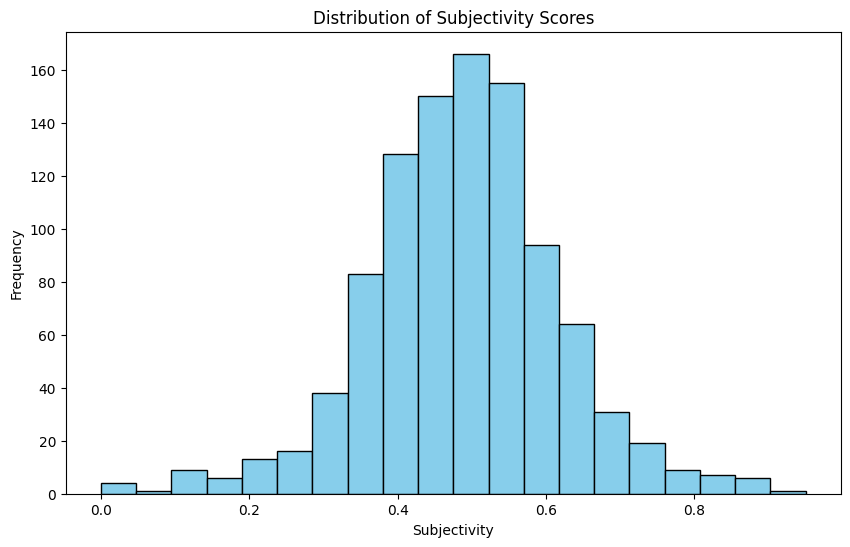

In [15]:
# Calculate the average subjectivity
average_subjectivity = df['subjectivity'].mean()
print(f'Average Subjectivity: {average_subjectivity}')

# Plot the distribution of subjectivity scores
plt.figure(figsize=(10, 6))
plt.hist(df['subjectivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

We can see that a majority of the reviews are moderately subjective inidicting a mix of personal and practial reviews

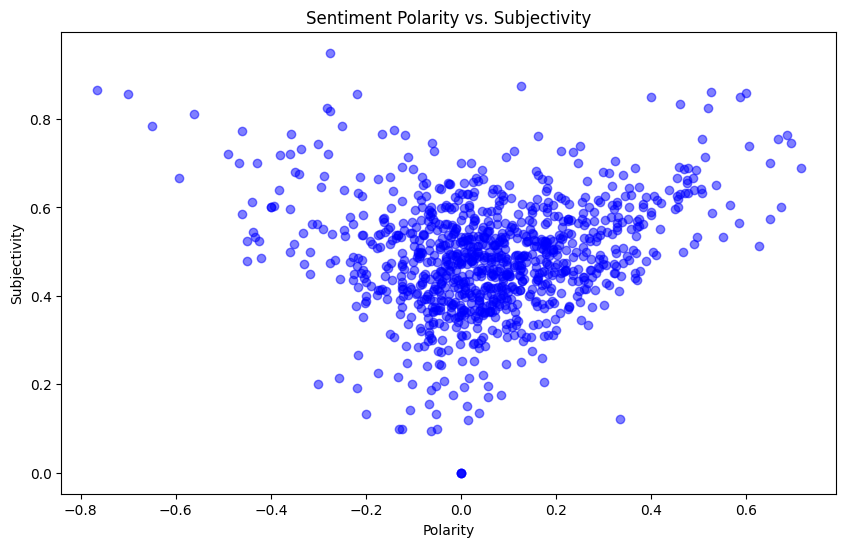

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['polarity'], df['subjectivity'], color='blue', alpha=0.5)
plt.title('Sentiment Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

From the graph we can understand that the polarity and subjectivity of the reviews do not have any specific relationship

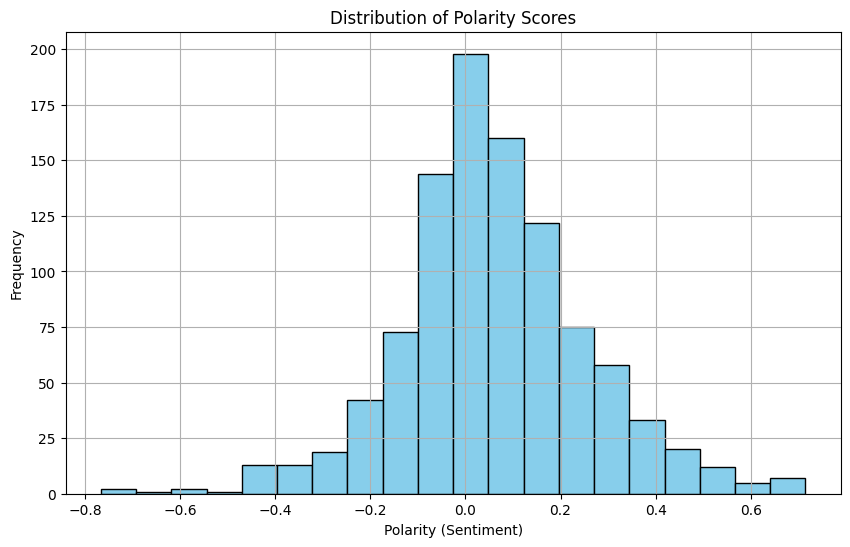

In [17]:
# Plotting the distribution of polarity scores
plt.figure(figsize=(10, 6))
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity (Sentiment)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Majority of the reviews are neutral

In [18]:
def categorize_polarity(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(categorize_polarity)

sentiment_counts = df['sentiment_category'].value_counts()

print(sentiment_counts)

sentiment_category
Positive    620
Negative    370
Neutral      10
Name: count, dtype: int64


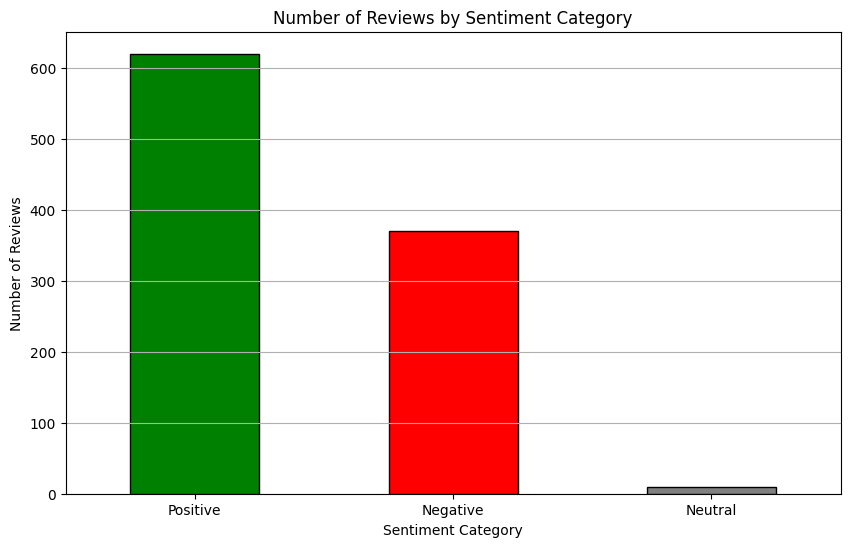

In [19]:
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'], edgecolor='black')
plt.title('Number of Reviews by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [20]:
total_sentiment_count=df['sentiment_category'].count()
total_sentiment_count

positive_percent=(620/1000)*100
neutral_percent=(10/1000)*100
negative_percent=(370/1000)*100

print(positive_percent," ", neutral_percent,"  ", negative_percent)

62.0   1.0    37.0


In [21]:
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]

# Convert to DataFrame for easier counting
keywords_df = pd.DataFrame(all_keywords, columns=['keyword'])

# Count the frequency of each keyword
keyword_counts = keywords_df['keyword'].value_counts()

# Display the most frequent keywords
print(keyword_counts.head(20))

keyword
flight             760
’                  529
ba                 480
london             306
time               290
check              250
food               233
get                226
told               210
british airways    207
seat               182
plane              169
service            160
heathrow           159
one                155
seats              155
would              150
staff              141
good               141
cancelled          124
Name: count, dtype: int64


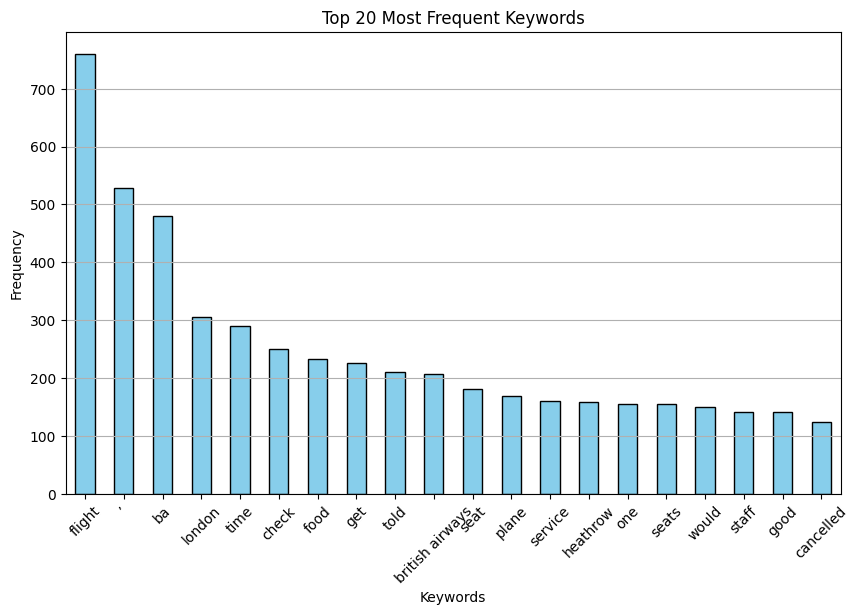

In [22]:
plt.figure(figsize=(10, 6))
keyword_counts.head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Most Frequent Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# Determine the sentiment of each keyword
def keyword_sentiment(keyword):
    return TextBlob(keyword).sentiment.polarity

keywords_sentiments = [(keyword, keyword_sentiment(keyword)) for keyword in all_keywords]

# Separate keywords into positive and negative categories
positive_keywords = [keyword for keyword, sentiment in keywords_sentiments if sentiment > 0]
negative_keywords = [keyword for keyword, sentiment in keywords_sentiments if sentiment < 0]

# Convert to DataFrames for easier counting
positive_keywords_df = pd.DataFrame(positive_keywords, columns=['keyword'])
negative_keywords_df = pd.DataFrame(negative_keywords, columns=['keyword'])


In [24]:
# Count the frequency of each keyword
positive_keyword_counts = positive_keywords_df['keyword'].value_counts()
negative_keyword_counts = negative_keywords_df['keyword'].value_counts()

# Display the most frequent keywords
print("Top Positive Keywords:")
print(positive_keyword_counts.head(10))

print("\nTop Negative Keywords:")
print(negative_keyword_counts.head(10))

Top Positive Keywords:
keyword
good           141
fly            101
friendly        91
able            68
ok              67
comfortable     63
fine            53
great           49
first           47
nice            46
Name: count, dtype: int64

Top Negative Keywords:
keyword
due              51
unfortunately    42
unable           36
poor             34
terrible         34
late             32
bad              30
long             29
least            28
half             27
Name: count, dtype: int64


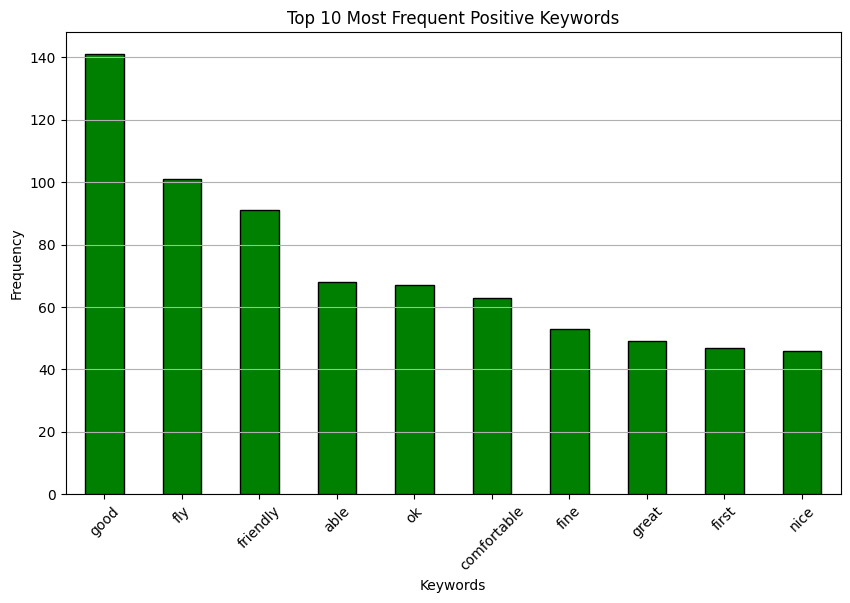

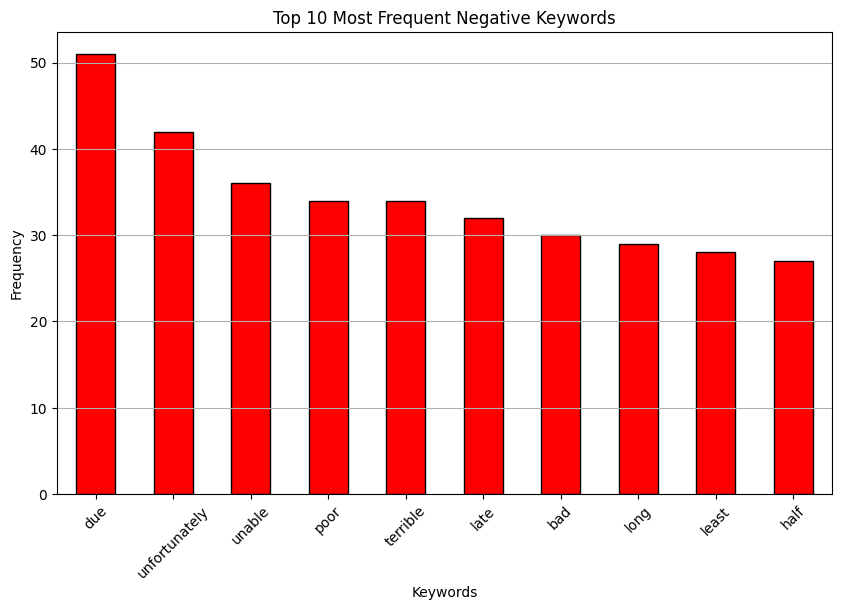

In [25]:
# Plot the top 10 most frequent positive keywords
plt.figure(figsize=(10, 6))
positive_keyword_counts.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Most Frequent Positive Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot the top 10 most frequent negative keywords
plt.figure(figsize=(10, 6))
negative_keyword_counts.head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Most Frequent Negative Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

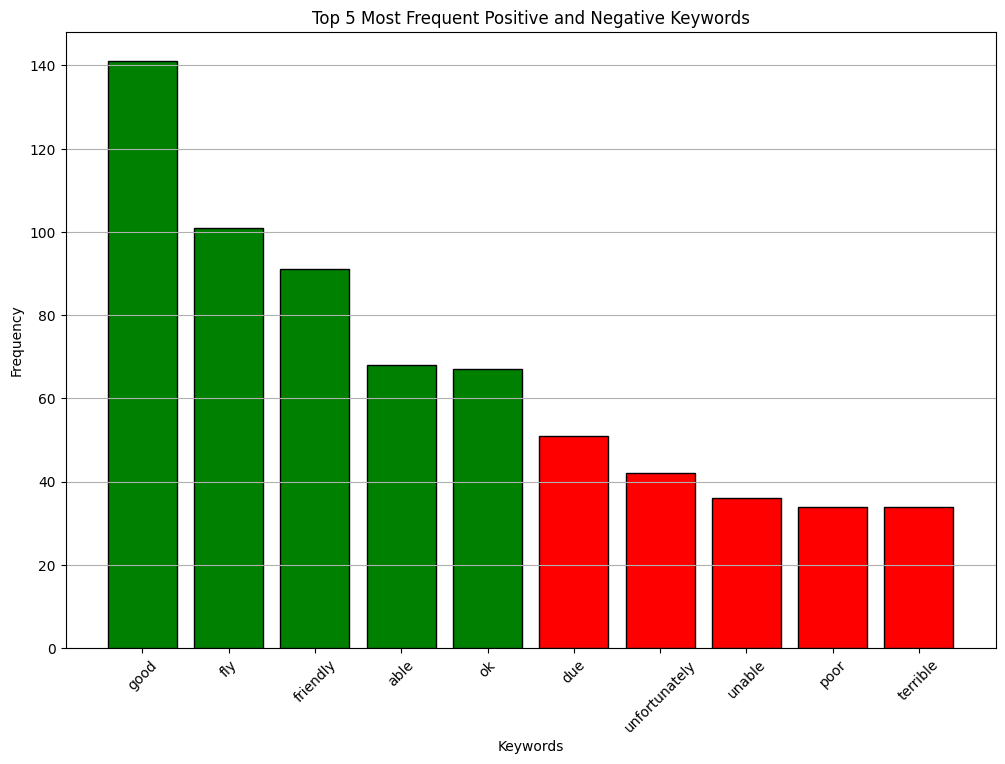

In [29]:
top_positive_keywords = positive_keyword_counts.head(5)
top_negative_keywords = negative_keyword_counts.head(5)

# Create a combined DataFrame with labels to distinguish positive and negative keywords
combined_keywords = pd.DataFrame({
    'Keyword': list(top_positive_keywords.index) + list(top_negative_keywords.index),
    'Count': list(top_positive_keywords.values) + list(top_negative_keywords.values),
    'Sentiment': ['Positive'] * len(top_positive_keywords) + ['Negative'] * len(top_negative_keywords)
})

# Plot the combined keywords
plt.figure(figsize=(12, 8))
colors = ['green' if sentiment == 'Positive' else 'red' for sentiment in combined_keywords['Sentiment']]
plt.bar(combined_keywords['Keyword'], combined_keywords['Count'], color=colors, edgecolor='black')
plt.title('Top 5 Most Frequent Positive and Negative Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()